In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from os.path import expanduser as ospath
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv(ospath("../Data/Data Set/Data Train/Data Train Pandas Correlation.csv"))
X_train = train.iloc[:,1:] # kolom fitur
y_train = train.iloc[:,:1] # kolom label
train.head()

,Label,AMR,nBondsS2,CIC0,nH,nBondsS3,GATS3s,SIC0,ATSC0v,ATS3e,...,AATS4e,SpAD_Dt,Kier1,nHeavyAtom,AMW,AATS1i,Mpe,Mare,MW,WTPT-1
0,0,152.0223,101.0,5.390269,58,43.0,0.000000,0.185109,4898.147300,2380.555660,...,7.396171,1212.463772,31.425620,40,5.739014,144.736506,0.940136,0.953469,562.423340,80.511498
1,1,63.3585,41.0,3.903831,21,20.0,0.932455,0.324756,2446.324593,1068.136260,...,8.166362,751.787623,28.569444,34,8.693571,151.208526,1.023886,1.042036,478.146404,68.015603
2,1,39.8206,27.0,3.036062,15,12.0,0.879281,0.368455,1493.394534,535.803010,...,7.913964,114.813967,11.076923,13,6.647056,150.406827,0.970448,0.987857,186.117573,24.986486
3,1,51.5910,38.0,3.611194,22,16.0,0.805772,0.316761,2007.274461,770.433398,...,7.701788,184.330070,15.058824,17,6.235267,151.700706,0.959075,0.975590,243.175422,32.973525
4,1,62.3639,39.0,4.048208,23,16.0,0.732657,0.279000,2396.871717,962.264824,...,7.768986,465.373095,20.727041,26,7.207861,149.405870,0.969428,0.983265,353.185175,52.681024


In [3]:
X_train.head()

,AMR,nBondsS2,CIC0,nH,nBondsS3,GATS3s,SIC0,ATSC0v,ATS3e,nAtom,...,AATS4e,SpAD_Dt,Kier1,nHeavyAtom,AMW,AATS1i,Mpe,Mare,MW,WTPT-1
0,152.0223,101.0,5.390269,58,43.0,0.000000,0.185109,4898.147300,2380.555660,98,...,7.396171,1212.463772,31.425620,40,5.739014,144.736506,0.940136,0.953469,562.423340,80.511498
1,63.3585,41.0,3.903831,21,20.0,0.932455,0.324756,2446.324593,1068.136260,55,...,8.166362,751.787623,28.569444,34,8.693571,151.208526,1.023886,1.042036,478.146404,68.015603
2,39.8206,27.0,3.036062,15,12.0,0.879281,0.368455,1493.394534,535.803010,28,...,7.913964,114.813967,11.076923,13,6.647056,150.406827,0.970448,0.987857,186.117573,24.986486
3,51.5910,38.0,3.611194,22,16.0,0.805772,0.316761,2007.274461,770.433398,39,...,7.701788,184.330070,15.058824,17,6.235267,151.700706,0.959075,0.975590,243.175422,32.973525
4,62.3639,39.0,4.048208,23,16.0,0.732657,0.279000,2396.871717,962.264824,49,...,7.768986,465.373095,20.727041,26,7.207861,149.405870,0.969428,0.983265,353.185175,52.681024


In [4]:
y_train.head()

,Label
0,0
1,1
2,1
3,1
4,1


In [5]:
# Feature Scaler Using StandarScaler()
scaler = StandardScaler()
scaler.fit(X_train)
scale_x_train = scaler.transform(X_train)

# Save scaler 
joblib.dump(scaler, '../Data/scaler.pkl')

scale_x_train

array([[ 1.35180365,  1.52733976,  1.25665504, ..., -0.8234547 ,
         0.81066268,  0.81597283],
       [-0.82249882, -0.86194363, -0.9577301 , ...,  2.08843384,
         0.09615418,  0.07392601],
       [-1.39971877, -1.41944309, -2.25046721, ...,  0.30713951,
        -2.37969619, -2.48128284],
       ...,
       [ 1.00463643,  1.08930447,  1.33813474, ..., -1.18410419,
         0.6919659 ,  0.80205652],
       [-1.03572876, -0.74247946, -0.29498971, ..., -0.05639518,
        -0.70866446, -0.6047174 ],
       [ 0.86668719,  0.81055474,  0.9518679 , ..., -1.14452904,
        -0.08855026,  0.02858956]])

In [6]:
# Convert the NumPy Array scale_x_train to DataFrame
scale_x_train = pd.DataFrame(scale_x_train, columns=X_train.columns)

scale_x_train

,AMR,nBondsS2,CIC0,nH,nBondsS3,GATS3s,SIC0,ATSC0v,ATS3e,nAtom,...,AATS4e,SpAD_Dt,Kier1,nHeavyAtom,AMW,AATS1i,Mpe,Mare,MW,WTPT-1
0,1.351804,1.527340,1.256655,1.385849,1.653999,-0.898131,-1.206222,1.166235,1.657235,1.252184,...,-0.720505,0.828184,0.637637,0.842318,-1.107631,-0.785636,-0.859541,-0.823455,0.810663,0.815973
1,-0.822499,-0.861944,-0.957730,-0.998384,-0.613943,1.311291,1.365352,-0.852070,-0.732116,-0.640068,...,2.016065,-0.205373,0.250288,0.114976,1.617753,1.217496,2.060296,2.088434,0.096154,0.073926
2,-1.399719,-1.419443,-2.250467,-1.385016,-1.402792,1.185300,2.170066,-1.636509,-1.701266,-1.828227,...,1.119266,-1.634466,-2.122015,-2.430718,-0.270022,0.969365,0.197254,0.307140,-2.379696,-2.481283
3,-1.111073,-0.981408,-1.393679,-0.933945,-1.008367,1.011121,1.218131,-1.213490,-1.274105,-1.344162,...,0.365384,-1.478502,-1.581997,-1.945824,-0.649870,1.369829,-0.199261,-0.096186,-1.895954,-2.006986
4,-0.846889,-0.941586,-0.742648,-0.869506,-1.008367,0.837878,0.522764,-0.892779,-0.924862,-0.904104,...,0.604143,-0.847963,-0.813284,-0.854812,0.247283,0.659562,0.161679,0.156170,-0.963280,-0.836691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,0.358141,0.810555,0.775749,1.063656,0.372119,-0.898131,-0.574508,1.190899,0.415461,0.900137,...,-1.143353,0.145950,1.126053,0.478647,0.294052,-0.478887,-0.877957,-0.909757,1.580875,0.355045
5177,0.884025,0.730912,0.775131,0.870340,0.470725,-0.898131,-0.503467,1.155907,0.552523,0.988149,...,-1.112433,0.253695,1.104105,1.084765,-0.281857,0.261627,-0.795032,-0.823163,1.216979,1.068376
5178,1.004636,1.089304,1.338135,1.256972,0.766543,-0.898131,-1.426964,1.287011,1.155053,1.164172,...,-1.317148,0.275233,0.838169,0.842318,-1.131868,-1.297217,-1.183584,-1.184104,0.691966,0.802057
5179,-1.035729,-0.742479,-0.294990,-0.611751,-0.909761,0.754420,-0.051664,-0.540783,-0.647021,-0.640068,...,-0.686712,-0.731094,-0.548428,-0.612365,0.025647,-0.241019,-0.045203,-0.056395,-0.708664,-0.604717


In [8]:
model = LogisticRegression()

In [9]:
class GA():
    def __init__(self, model, popsize, max_feat, iter_=50, seed=5):
        self.model = model
        self.popsize = popsize
        self.max_feat = max_feat
        # self.rng = np.random.RandomState(seed)
        self.rng = np.random
        self.iter_ = iter_
        
    def popinit(self,X):
        nfeat = X.shape[1]
        listpop = []
        for i in range(self.popsize):
            pop_ = self.rng.choice(nfeat, self.max_feat, replace=False) # mengambil nilai gen untuk tiap kromosom, dari rentang nilai nfeat di ambil sebanyak max_feat
            pop_ = list(pop_)
            pop_.sort()
            listpop.append(pop_)
        return listpop
        
    def fitness(self,pop,x,y):
        X_train_tmp, X_val_tmp, y_train_tmp, y_val_tmp, = train_test_split(x, y, test_size=0.20, random_state=42, shuffle=True)
        save_fit = []
        for i in range(len(pop)):
            x_slice = X_train_tmp.iloc[:,pop[i]]
            x_slice_val = X_val_tmp.iloc[:,pop[i]]
            self.model.fit(x_slice,y_train_tmp)
            y_pred = self.model.predict(x_slice_val)
            mse = log_loss(y_val_tmp, y_pred)
            fitness = 1/ (mse + 1e-10)
            save_fit.append(fitness)
        return save_fit
    
    def parent_select(self, pop, fit):
        sum_fit = np.sum(fit)
        prob = [x/sum_fit for x in fit]
        prob_range = []
        sum_ = 0
        for i in range(len(prob)):
            sum_ += prob[i]
            prob_range.append(sum_)
        # select first parent
        for i in range(len(prob)):
            rand = self.rng.rand()
            if rand <= prob_range[i]:
                parent_1 = pop[i]
                break
        # select second parent
        parent_2 = parent_1
        while (parent_2 == parent_1):
            for i in range(len(prob)):
                rand = self.rng.rand()
                if rand <= prob_range[i]:
                    parent_2 = pop[i]
                    break
        return parent_1, parent_2
    
    def cross_over(self, parent_1, parent_2):
        # Satu titik
        point = len(parent_1) - 1
        point_list = list(range(point))
        point_list = [x+1 for x in point_list]
        point_sel = self.rng.choice(point_list, 1)[0]
        child_1 = parent_1[:point_sel] + parent_2[point_sel:]
        child_2 = parent_2[:point_sel] + parent_1[point_sel:]
        return child_1, child_2
    
    def mutation(self, child_1, child_2, x):
        max_feat_list = list(range(x.shape[1]))
        feat_sel_child_1 = set(max_feat_list).difference(set(child_1)) # Bagian max_feat_list yang tidak ada di child_1
        feat_sel_child_1 = list(feat_sel_child_1)
        feat_sel_child_2 = set(max_feat_list).difference(set(child_2))
        feat_sel_child_2 = list(feat_sel_child_2)
        for i in range(len(child_1)):
            rand_1 = self.rng.rand()
            rand_2 = self.rng.rand()
            if rand_1 <= 0.01: # Mutasi sebesar 0,01%
                new_feat = self.rng.choice(feat_sel_child_1, 1)[0]
                child_1[i] = new_feat
            if rand_2 <= 0.01:
                new_feat = self.rng.choice(feat_sel_child_2, 1)[0]
                child_2[i] = new_feat
        return child_1, child_2
    
    def sort(self, pop, fit):
        tmp_dict = {'fitness': fit}
        df = pd.DataFrame(tmp_dict)
        df.reset_index(inplace=True)
        df.sort_values('fitness', ascending=False, inplace=True)
        idx_ = df.index.values.tolist()
        fit = df['fitness'].values.tolist()
        new_pop = []
        for i in idx_:
            new_pop.append(pop[i])
        return new_pop, fit
    
    def fit(self,x,y):
        mse_list = []
        pop = self.popinit(x)
        fitness = self.fitness(pop,x,y)
        mses = [1/x for x in fitness]
        mse_list.append(np.min(mses))
        for i in range(self.iter_): # Steady-State (Fitness-based selection)
            parent_1, parent_2 = self.parent_select(pop, fitness)
            child_1, child_2 = self.cross_over(parent_1, parent_2)
            child_1, child_2 = self.mutation(child_1, child_2, x)
            pop, fitness = self.sort(pop, fitness)
            pop[-1] = child_1; pop[-2] = child_2
            fitness = self.fitness(pop,x,y)
            mses = [1/x for x in fitness]
            mse_list.append(np.average(mses))
        idx_ = np.argmax(fitness)
        best_pop = pop[idx_]
        return mse_list, best_pop
            

In [10]:
# Running 20 kali untuk 5, 6, 7, 8, 9, 10 features yang diambil / 6 jenis (Logistic Regression) 
# Nilai MSE terendah dipilih, untuk dijadikan sebagai acuan dalam membentuk kombinasi terbaik
list_mse_distribution = []
list_feat = []
allDataLowestMSE = []
for i in range(6): 
    nilai_feat = i + 5 # Nilai_feat untuk berapa fitur yang diambil
    mse_now = []
    # feat_now = []
    # dataLowestMSE = []
    for j in tqdm(range(20)): # Running 20x untuk menangani faktor acak AG
        featSelection = GA(model=model, popsize=10, max_feat=nilai_feat, iter_=100)
        mse, feat = featSelection.fit(scale_x_train, y_train)
        if not mse_now :
            dataLowestMSE = mse
            feat_now = feat
        else :
            if mse[-1] < min(mse_now) : 
                dataLowestMSE = mse
                feat_now = feat
        mse_now.append(mse[-1])
        # feat_now.append(feat)
    list_feat.append(feat_now) # Point A
    list_mse_distribution.append(mse_now) # Point B
    allDataLowestMSE.append(dataLowestMSE) # Point C


100%|██████████| 20/20 [07:39<00:00, 22.97s/it]


In [11]:
# save session 
import dill
dill.dump_session('../Data/Genetic Algorithm (GA) - Iterasi 100x.db')

# print out everything
list_feat = np.array(list_feat) # Final FEAT for lowest MSE value (all running)
list_mse_distribution = np.array(list_mse_distribution) # Final MSE for all running
allDataLowestMSE = np.array(allDataLowestMSE) # Data lowest MSE value each row 

print('FEAT : ', '\n', list_feat)
print('MSE Distribution (POINT B) : ', '\n', list_mse_distribution)
print('Data Lowest MSE (POINT C): ', '\n', allDataLowestMSE)


FEAT :  
 [list([1, 18, 66, 34, 94]) list([0, 39, 27, 47, 61, 74])
 list([23, 44, 51, 59, 60, 81, 98]) list([5, 44, 69, 70, 86, 88, 91, 98])
 list([2, 4, 0, 64, 66, 88, 12, 93, 97])
 list([0, 6, 48, 53, 58, 61, 69, 70, 65, 77])]
MSE Distribution (POINT B) :  
 [[0.5662187  0.53291303 0.50959853 0.54290504 0.54956625 0.50626796
  0.53624445 0.48295376 0.63283312 0.51959061 0.49960583 0.50293732
  0.50959945 0.62617183 0.54290427 0.6028574  0.66947105 0.59952591
  0.56622102 0.54956641]
 [0.47629209 0.4996066  0.53291303 0.56622024 0.58620388 0.49960505
  0.53624445 0.49960737 0.60618728 0.50626796 0.57954313 0.5362446
  0.53291373 0.53624453 0.50626873 0.56955035 0.59952599 0.4996066
  0.50293724 0.59952668]
 [0.49960683 0.5495671  0.65281783 0.50293493 0.50626873 0.53291149
  0.55622777 0.52625213 0.56955174 0.53291381 0.53624522 0.53291303
  0.5928664  0.50959722 0.4996066  0.53624445 0.4696308  0.50959868
  0.50293585 0.53624522]
 [0.50626804 0.50959853 0.50626788 0.47295998 0.499606

In [12]:
ready_export_feat = list_feat.tolist() # Final FEAT for lowest MSE value (all running)
ready_export_mse_distribution = list_mse_distribution.tolist() # Final MSE for all running
ready_export_LowestMSE = allDataLowestMSE.tolist() # Data lowest MSE value each row 

# np.savetxt('../Data/List FEAT (Iterasi 100x).csv', ready_export_feat, delimiter=',', fmt ='% s')
np.savetxt('../Data/List MSE (Iterasi 100x).csv', ready_export_mse_distribution, delimiter =',', fmt ='% s')
np.savetxt('../Data/List All Data Lowest MSE (Iterasi 100x).csv', ready_export_LowestMSE, delimiter=',', fmt ='% s')


In [13]:
# save selective deskriptor 5 - 10 features yang diambil 
desk_name = X_train.columns.values.tolist()
desk_name = np.array(desk_name)
selective_deskriptor = []

for i in range(len(ready_export_feat)):
    sel_desk = list(desk_name[ready_export_feat[i]])
    selective_deskriptor.append(sel_desk)

# print("desk_name : ", desk_name)
# print("selective_deskriptor : ", selective_deskriptor)

# save selective deskriptor 5 - 10 features yang diambil (save as pickle)
joblib.dump(selective_deskriptor, '../Data/selective_deskriptor (Iterasi 100x).pkl') 

['../Data/selective_deskriptor (Iterasi 100x).pkl']

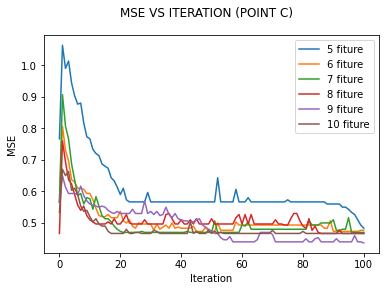

In [14]:
# plot MSE vs iteration/temperature for selected features => single running (point C)
nilai_data = 5
for i in range(len(allDataLowestMSE)):
    # plt.figure()
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.suptitle('MSE VS ITERATION (POINT C)')
    plt.plot(allDataLowestMSE[i], label='%s fiture' % nilai_data)
    plt.legend()
    nilai_data+=1

In [15]:
# load session genetic algorithm 
import dill
dill.load_session('../Data/Genetic Algorithm (GA) - Iterasi 100x.db')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


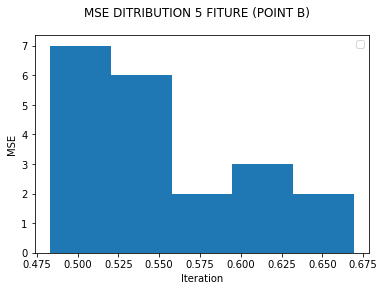

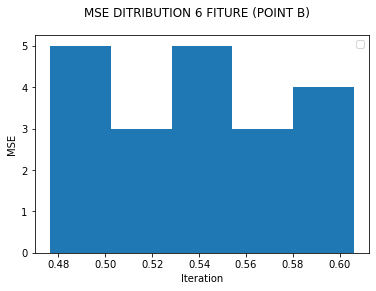

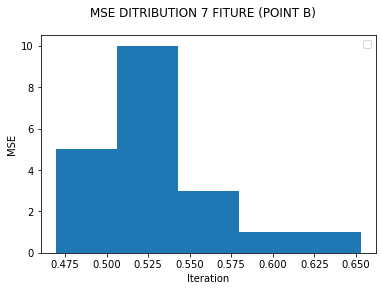

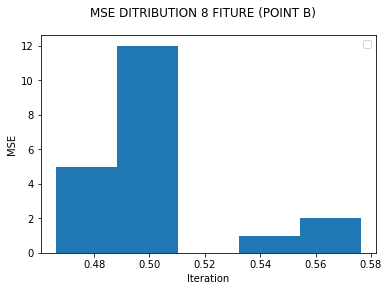

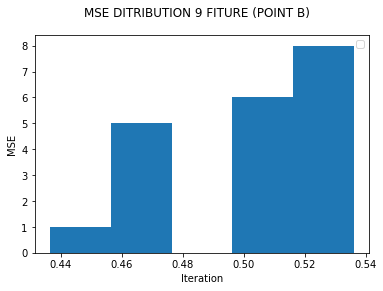

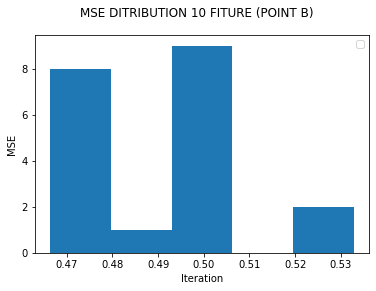

In [16]:
# plot mse ditribution (point B) 5-10 jenis fitur yg diambil
for i in range(len(list_mse_distribution)):
    a = i + 5
    plt.figure()
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.suptitle('MSE DITRIBUTION %s FITURE' % a)
    plt.hist(list_mse_distribution[i], bins=5)
    plt.legend()
    